## Introduction

As we need to scrap a lot of data, we will performe the initial analysis for milestone 2 on a subset of movies and the actors that play in those movies. This is done to show the viability of our approaches. Then as soon as we have the full set of the data, we will scale up our analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_movies_subset=pd.read_pickle('movies_subset.pkl')
df_actors_awards=pd.read_pickle('actors_awards_subset.pkl')
df_movies=pd.read_csv('data/title.basics.tsv', sep='\t')
df_actors=pd.read_csv('data/name.basics.tsv', sep='\t')

/home/laurent/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_movies_subset.head()


,tconst,stars,oscarWins,nominations,wins,releaseDate,releaseCountry,plotKeywords,budget,worldwideGross,metascore,musicProducer
0,tt0014799,"[nm0265550, nm0370407, nm0550195]",0,0,0,1924-05-31,UK,[],None,None,None,None
1,tt0014843,"[nm0427659, nm0107574, nm0421138]",0,0,0,1924-08-24,USA,[],None,None,None,None
2,tt0014809,"[nm0267916, nm0119572, nm0055809]",0,0,0,1924-04-08,USA,[],None,None,None,None
3,tt0014751,"[nm0403710, nm0744408]",0,0,0,None,None,[],None,None,None,None
4,tt0014812,"[nm0556953, nm0531962, nm0645941]",0,0,0,1924-12-28,USA,[],None,None,None,None


In [4]:
print(df_movies_subset.shape)

(178117, 12)


In [5]:
df_movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
df_movies.shape

(6311430, 9)

In [7]:
#adding our scrapped data to the original data se
movies_data=df_movies_subset.merge(df_movies,how='inner', on='tconst')

In [9]:
with pd.option_context('display.max_columns', 50):
    display(movies_data.head())

,tconst,stars,oscarWins,nominations,wins,releaseDate,releaseCountry,plotKeywords,budget,worldwideGross,metascore,musicProducer,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0014799,"[nm0265550, nm0370407, nm0550195]",0,0,0,1924-05-31,UK,[],None,None,None,None,movie,The Conspirators,The Conspirators,0,1924,\N,\N,"Crime,Drama"
1,tt0014843,"[nm0427659, nm0107574, nm0421138]",0,0,0,1924-08-24,USA,[],None,None,None,None,movie,The Desert Outlaw,The Desert Outlaw,0,1924,\N,60,Western
2,tt0014809,"[nm0267916, nm0119572, nm0055809]",0,0,0,1924-04-08,USA,[],None,None,None,None,movie,Crossed Trails,Crossed Trails,0,1924,\N,50,Western
3,tt0014751,"[nm0403710, nm0744408]",0,0,0,None,None,[],None,None,None,None,movie,La buenaventura de Pitusín,La buenaventura de Pitusín,0,1924,\N,\N,\N
4,tt0014812,"[nm0556953, nm0531962, nm0645941]",0,0,0,1924-12-28,USA,[],None,None,None,None,movie,Curlytop,Curlytop,0,1924,\N,60,"Drama,Romance"


## Data Wrangling

In movies_data we need to change a few columns to achive our goal:

- releaseDate, here we only want the month, to see if there is seasonality
- for budget and wordwideGross we can combine into one -> percentage worldwideGross over budget. This is necessary to be able to compare between the movies as the budgets and wordlwideGross are given in local currency and are therefore not directly comparable
- genre: We want to give each movie only one genre

Furthermore, there are some columns we are not interested in, that we can drop.

In [11]:
#extracting month
movies_data['releaseMonth']=movies_data['releaseDate'].map(lambda x:  x.month if x != None else None)

In [12]:
#first we need to change worldwideGross and budget to integers
import re
def to_int(x):
    if x ==None:
        return None
    else:
        return int(re.sub('[^0-9,]', "", x).replace(",", ""))
    
movies_data['budget']=movies_data['budget'].apply(to_int)
movies_data['worldwideGross']=movies_data['worldwideGross'].apply(to_int)
#now we can calculate the revenue percentage
movies_data['revenue']=movies_data['worldwideGross']/movies_data['budget']-1

In [18]:
#only extracting one genre
#Needs to be improved as genres are just orderd in alphabetical order not importance
movies_data.genres=movies_data.genres.str.split(',').str.get(0)

In [21]:
#now we can drop what we don't need
movies_cleaned=movies_data[['tconst','stars','oscarWins','nominations','wins','releaseCountry','metascore','startYear','runtimeMinutes','genres','releaseMonth','revenue']]

In [22]:
movies_cleaned.head()

,tconst,stars,oscarWins,nominations,wins,releaseCountry,metascore,startYear,runtimeMinutes,genres,releaseMonth,revenue
0,tt0014799,"[nm0265550, nm0370407, nm0550195]",0,0,0,UK,None,1924,\N,Crime,5.0,NaN
1,tt0014843,"[nm0427659, nm0107574, nm0421138]",0,0,0,USA,None,1924,60,Western,8.0,NaN
2,tt0014809,"[nm0267916, nm0119572, nm0055809]",0,0,0,USA,None,1924,50,Western,4.0,NaN
3,tt0014751,"[nm0403710, nm0744408]",0,0,0,None,None,1924,\N,\N,NaN,NaN
4,tt0014812,"[nm0556953, nm0531962, nm0645941]",0,0,0,USA,None,1924,60,Drama,12.0,NaN


Out of the awards data of the actors we want to build a score for the actors. For now we keep it simple, we give one point for each nomination and 5 points for each award win. Later we can improve this score, by giving different scores depending on which award was won.

In [23]:
df_actors_awards.head()

,nconst,year,category,w_n,description,movie,tconst
0,nm0309470,2005,David,Nominee,Best Supporting Actress (Migliore Attrice non ...,Cuore sacro,tt0429898
1,nm0309470,1968,Golden Plate,Winner,,Grazie zia,tt0063033
2,nm0309470,2005,Golden Ciak,Winner,Best Supporting Actress (Migliore Attrice Non ...,Cuore sacro,tt0429898
3,nm0309470,1967,Golden Globe,Winner,Best Actress (Migliore Attrice),Svegliati e uccidi,tt0061049
4,nm0309470,1968,Golden Goblet,Winner,Best Actress (Migliore Attrice),Grazie zia,tt0063033


In [90]:
scoring=pd.DataFrame(df_actors_awards.groupby('nconst').w_n.value_counts().rename_axis(['nconst','type']).reset_index())

In [91]:
scoring.head()

,nconst,type,w_n
0,nm0000001,Winner,18
1,nm0000001,Nominee,7
2,nm0000002,Winner,20
3,nm0000002,Nominee,13
4,nm0000003,Nominee,2


In [92]:
scoring['w_n'][scoring['type']=='Winner']=scoring['w_n']*5

/home/laurent/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
scoring=pd.DataFrame(scoring.groupby('nconst')['w_n'].sum().reset_index().rename(columns={"w_n": "score"}))

In [141]:
actor_data=df_actors.merge(scoring, how='inner', on='nconst')

In [144]:
#splitting professions
actor_data.primaryProfession=actor_data.primaryProfession.str.split(',')

In [150]:
def m_f(x):
    if type(x) is list:
        if 'actor' in x:
            return 'M'
        elif 'actress' in x:
            return 'F'
        else:
            return None
    else:
        return None

In [152]:
actor_data['gender']=actor_data.primaryProfession.apply(m_f)

In [153]:
actor_data.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,score,gender
0,nm0000001,Fred Astaire,1899,1987,"[soundtrack, actor, miscellaneous]","tt0043044,tt0050419,tt0072308,tt0053137",97,M
1,nm0000002,Lauren Bacall,1924,2014,"[actress, soundtrack]","tt0117057,tt0038355,tt0071877,tt0037382",113,F
2,nm0000003,Brigitte Bardot,1934,\N,"[actress, soundtrack, producer]","tt0054452,tt0049189,tt0059956,tt0057345",12,F
3,nm0000004,John Belushi,1949,1982,"[actor, writer, soundtrack]","tt0077975,tt0080455,tt0078723,tt0072562",15,M
4,nm0000005,Ingmar Bergman,1918,2007,"[writer, director, actor]","tt0083922,tt0069467,tt0050986,tt0050976",428,M


In [155]:
actor_cleaned=actor_data[['nconst','birthYear','score','gender']]

Now we can add the cast score to each movie.

In [173]:
print(movies_cleaned.stars[0][0])

nm0265550


In [179]:
actor_cleaned.loc[actor_cleaned['nconst'].isin(movies_cleaned.stars[0]),'score'].sum()


0

In [182]:
#for full dataset we probably need a better method
cast_score=[]
for stars in movies_cleaned.stars:
    cast_score.append(actor_cleaned.loc[actor_cleaned['nconst'].isin(stars),'score'].sum())

movies_cleaned['castScore']=cast_score

/home/laurent/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [192]:
movies_cleaned.fillna(value=pd.np.nan, inplace=True)

/home/laurent/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [201]:
movies_cleaned.replace(r'\N',np.nan, inplace=True)

/home/laurent/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [202]:
movies_cleaned.head()

,tconst,stars,oscarWins,nominations,wins,releaseCountry,metascore,startYear,runtimeMinutes,genres,releaseMonth,revenue,castScore
0,tt0014799,"[nm0265550, nm0370407, nm0550195]",0,0,0,UK,NaN,1924,NaN,Crime,5.0,NaN,0
1,tt0014843,"[nm0427659, nm0107574, nm0421138]",0,0,0,USA,NaN,1924,60,Western,8.0,NaN,15
2,tt0014809,"[nm0267916, nm0119572, nm0055809]",0,0,0,USA,NaN,1924,50,Western,4.0,NaN,0
3,tt0014751,"[nm0403710, nm0744408]",0,0,0,NaN,NaN,1924,NaN,NaN,NaN,NaN,0
4,tt0014812,"[nm0556953, nm0531962, nm0645941]",0,0,0,USA,NaN,1924,60,Drama,12.0,NaN,0


## Data exploration

#### Actors data

In [207]:
actor_cleaned.isnull().sum(axis = 0)

nconst         0
birthYear      0
score          0
gender       317
dtype: int64

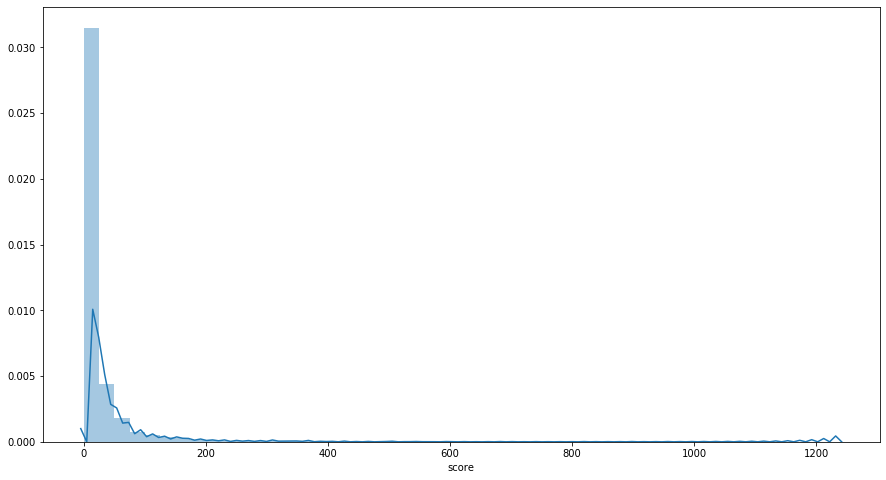

In [208]:
plt.figure(figsize=(15,8))
sns.distplot(actor_cleaned['score'])actor_cleaned

Text(0.5, 1.0, 'Scores of male actors')

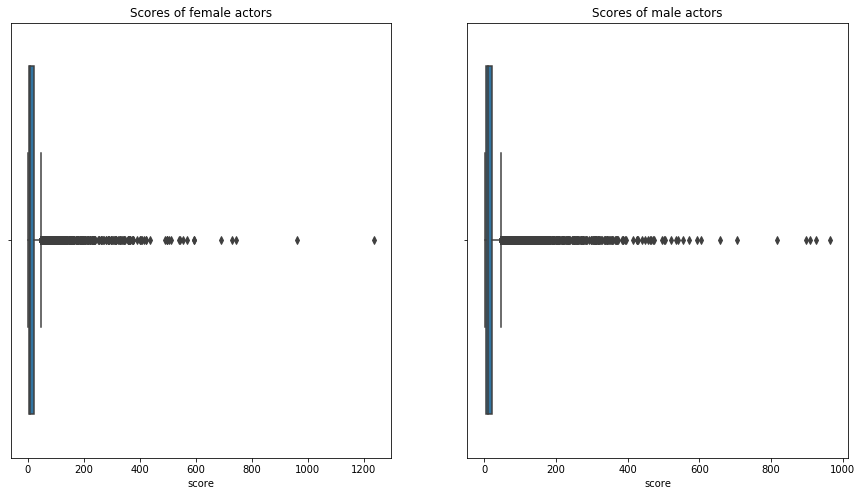

In [216]:
plt.figure(figsize=(15,8))
plt.subplot(121)  #sublot(Anzahl Zeilen Anzahl Spalten Bild Nummer)
sns.boxplot(actor_cleaned[actor_cleaned['gender']=='F']['score'])
plt.title('Scores of female actors')


plt.subplot(122)
sns.boxplot(actor_cleaned[actor_cleaned['gender']=='M']['score'])
plt.title('Scores of male actors')



In [203]:
movies_cleaned.isnull().sum(axis = 0)

tconst                 0
stars                  0
oscarWins              0
nominations            0
wins                   0
releaseCountry     47718
metascore         173165
startYear            215
runtimeMinutes     49067
genres             33579
releaseMonth       66147
revenue           173683
castScore              0
dtype: int64

In [205]:
movies_cleaned.shape

(178115, 13)